# 用KMeans实现订单聚类分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

## 数据勘查

In [2]:
# 读取订单数据
data = pd.read_csv(r'../Datasets/orders.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer     30000 non-null  int64  
 1   order        30000 non-null  int64  
 2   total_items  30000 non-null  int64  
 3   discount%    30000 non-null  float64
 4   weekday      30000 non-null  int64  
 5   hour         30000 non-null  int64  
 6   Food%        30000 non-null  float64
 7   Fresh%       30000 non-null  float64
 8   Drinks%      30000 non-null  float64
 9   Home%        30000 non-null  float64
 10  Beauty%      30000 non-null  float64
 11  Health%      30000 non-null  float64
 12  Baby%        30000 non-null  float64
 13  Pets%        30000 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 3.2 MB


In [4]:
# 截取后面的8列数据
d = data.iloc[:, -8:]

d.sample(5)

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
24932,46.89,53.11,0.00,0.0,0.00,0.0,0.0,0.0
27027,0.00,0.00,0.00,0.0,0.00,0.0,100.0,0.0
7036,13.90,75.97,6.18,0.0,3.95,0.0,0.0,0.0
16242,22.76,42.89,24.79,0.0,9.55,0.0,0.0,0.0
5063,100.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0


## 算法实现

In [8]:
class KMeans:
    
    # 初始化
    # k: 聚类个数
    # times: 迭代次数
    def __init__(self, k, times):
        self.k = k
        self.times = times
        
    # 训练
    def fit(self, X):
        X = np.asarray(X)
        
        # 设置随机种子，以便产生相同的随机序列
        np.random.seed(0)
        
        # 从数组中随机选择k个点作为初始聚类中心
        self.cluster_centers_ =  X[np.random.randint(0, len(X), self.k)]
        self.labels_ = np.zeros(len(X))
        
        # 迭代
        for t in range(self.times):
            for index, x in enumerate(X):
                # 计算每个样本与聚类中心的距离
                dis = np.sqrt(np.sum((x - self.cluster_centers_) ** 2, axis=1))
                # 将最小距离的索引赋值给标签数组，索引的值就是当前点所属的簇，范围是[0, k-1]
                self.labels_[index] = dis.argmin()
            # 循环遍历每一个簇
            for i in range(self.k):
                # 计算每个簇内所有点的均值，更新聚类中心
                self.cluster_centers_[i] = np.mean(X[self.labels_ == i], axis=0)
                
    # 预测
    def predict(self, X):
        X = np.asarray(X)
        result = np.zeros(len(X))
        for index,x in enumerate(X):
            # 计算样本到每个聚类中心的距离
            dis = np.sqrt(np.sum((x - self.cluster_centers_) ** 2, axis=1))
            # 找到距离最近的聚类中心，划分类别
            result[index] = dis.argmin()
        return result

In [9]:
# 训练模型
kmeans = KMeans(3, 50)
kmeans.fit(d)

In [10]:
# 查看聚类中心
kmeans.cluster_centers_

array([[46.33977936,  8.93380516, 23.19047005, 13.11741633,  4.8107557 ,
         1.17283735,  1.35704647,  0.95392773],
       [19.5308009 , 50.42856608, 14.70652695,  7.89437019,  3.69829234,
         0.91000428,  1.92515077,  0.82113238],
       [ 7.93541008,  4.56182052, 30.65583437, 18.57726789,  8.61597195,
         1.28482514, 26.81950293,  1.30158264]])

In [11]:
# 查看某个簇内的所有样本数据
d[kmeans.labels_ == 0]

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
15,48.23,20.37,15.38,8.29,7.73,0.0,0.0,0.0
23,24.10,22.29,38.69,14.92,0.00,0.0,0.0,0.0
24,36.51,31.93,27.18,4.38,0.00,0.0,0.0,0.0
40,22.76,0.00,0.00,77.24,0.00,0.0,0.0,0.0
43,65.64,12.36,21.99,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
29974,33.93,0.00,17.46,41.46,7.15,0.0,0.0,0.0
29977,45.10,0.00,26.68,28.22,0.00,0.0,0.0,0.0
29988,28.21,0.00,48.34,23.44,0.00,0.0,0.0,0.0
29989,61.32,0.00,23.34,15.34,0.00,0.0,0.0,0.0


In [12]:
# 预测新样本
kmeans.predict([[30, 30, 40, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 30, 30, 40], [30, 30, 0, 0, 0, 0, 20, 20]])

array([0., 2., 1.])

## 购买食物与生鲜的聚类分析

In [13]:
d2 = data.loc[:, 'Food%':'Fresh%']
kmeans = KMeans(3, 50)
kmeans.fit(d2)

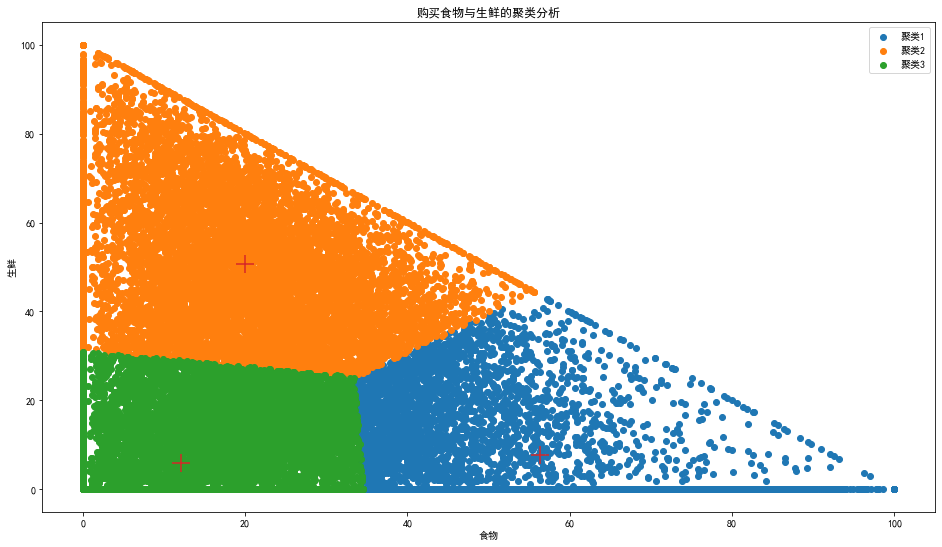

In [15]:
# 设置图表大小
plt.figure(figsize=(16, 9))

# 绘制每个聚类的散点图
plt.scatter(d2[kmeans.labels_ == 0].iloc[:, 0], d2[kmeans.labels_ == 0].iloc[:, 1], label="聚类1")
plt.scatter(d2[kmeans.labels_ == 1].iloc[:, 0], d2[kmeans.labels_ == 1].iloc[:, 1], label="聚类2")
plt.scatter(d2[kmeans.labels_ == 2].iloc[:, 0], d2[kmeans.labels_ == 2].iloc[:, 1], label="聚类3")

# 绘制聚类中心
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="+", s=300)

# 渲染图表
plt.title("购买食物与生鲜的聚类分析")
plt.xlabel("食物")
plt.ylabel("生鲜")
plt.legend()
plt.show()